In [1]:
# Import Statements
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

## 1. Visualizing data

In [2]:
import pandas as pd
df=pd.read_csv("datos_df_et.csv")
print(df.head())

   Index  Room Temp  Unnamed: 2
0      1   26.06472         NaN
1      2   26.06472         NaN
2      3   26.07985         NaN
3      4   26.06472         NaN
4      5   26.06472         NaN


In [3]:
del df['Unnamed: 2']

In [4]:
df

,Index,Room Temp
0,1,26.06472
1,2,26.06472
2,3,26.07985
3,4,26.06472
4,5,26.06472
...,...,...
195,196,26.06712
196,197,26.27514
197,198,26.27320
198,199,26.27481


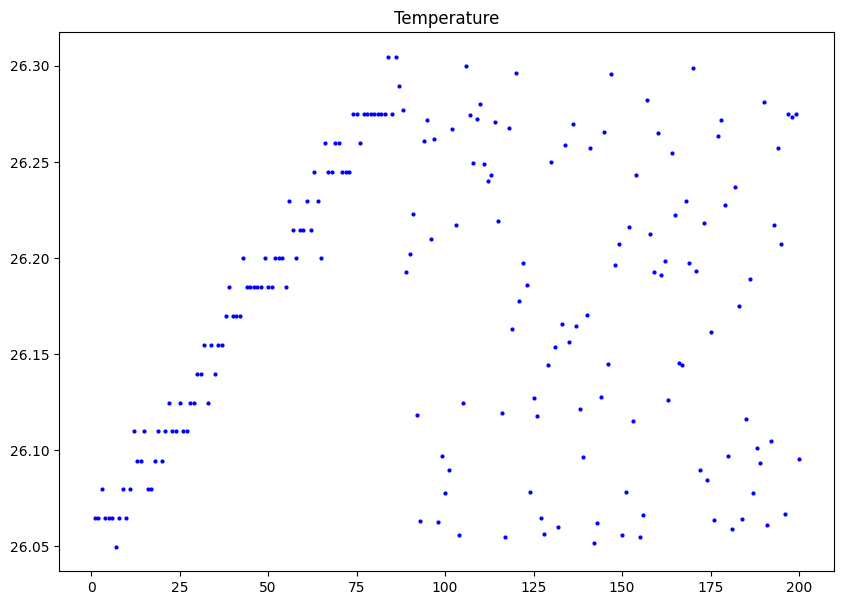

In [5]:
# Visualize temp information on plot scatters
plt.figure(figsize=(10,7))
# Plot temperature data
plt.scatter(df['Index'], df['Room Temp'], c='b', s=4, label="Temperature")
# Plot title
plt.title("Temperature")
# Show the plot
plt.show()

## 2. Preparing data

In [6]:
# Convert temperature and pressure to arrays
X_numpy = df['Room Temp'].to_numpy()

X_numpy

array([26.06472, 26.06472, 26.07985, 26.06472, 26.06472, 26.06472,
       26.04984, 26.06472, 26.07985, 26.06472, 26.07985, 26.10985,
       26.09472, 26.09472, 26.10985, 26.07985, 26.07985, 26.09472,
       26.10985, 26.09472, 26.10985, 26.12473, 26.10985, 26.10985,
       26.12473, 26.10985, 26.10985, 26.12473, 26.12473, 26.13985,
       26.13985, 26.15473, 26.12473, 26.15473, 26.13985, 26.15473,
       26.15473, 26.16985, 26.18473, 26.16985, 26.16985, 26.16985,
       26.19986, 26.18473, 26.18473, 26.18473, 26.18473, 26.18473,
       26.19986, 26.18473, 26.18473, 26.19986, 26.19986, 26.19986,
       26.18473, 26.22986, 26.21473, 26.19986, 26.21473, 26.21473,
       26.22986, 26.21473, 26.24474, 26.22986, 26.19986, 26.25986,
       26.24474, 26.24474, 26.25986, 26.25986, 26.24474, 26.24474,
       26.24474, 26.27474, 26.27474, 26.25986, 26.27474, 26.27474,
       26.27474, 26.27474, 26.27474, 26.27474, 26.27474, 26.30474,
       26.27474, 26.30474, 26.28962, 26.27697, 26.19277, 26.20

In [7]:
# Randomize
np.random.shuffle(X_numpy)
X_numpy

array([26.10494, 26.27481, 26.19986, 26.06472, 26.26491, 26.22958,
       26.06465, 26.26966, 26.24474, 26.25986, 26.18473, 26.12722,
       26.27474, 26.19623, 26.2227 , 26.19277, 26.07757, 26.27514,
       26.10985, 26.17043, 26.18473, 26.16294, 26.10985, 26.07985,
       26.22986, 26.19986, 26.12777, 26.22986, 26.16985, 26.18473,
       26.19986, 26.05602, 26.19986, 26.16985, 26.12475, 26.09472,
       26.1447 , 26.27254, 26.20751, 26.15629, 26.09712, 26.24943,
       26.09472, 26.12473, 26.06712, 26.19986, 26.26105, 26.22235,
       26.22986, 26.18473, 26.19763, 26.07985, 26.10985, 26.29578,
       26.06382, 26.05886, 26.09682, 26.27474, 26.15376, 26.24474,
       26.12161, 26.27474, 26.06001, 26.18473, 26.06132, 26.11509,
       26.10985, 26.05653, 26.27184, 26.05468, 26.2074 , 26.2547 ,
       26.29888, 26.21255, 26.06296, 26.27474, 26.15473, 26.27424,
       26.05195, 26.06472, 26.07985, 26.2022 , 26.18473, 26.19318,
       26.12473, 26.11819, 26.16985, 26.10985, 26.29652, 26.25

In [8]:
# Convert temperature to torch data bc of datatype
X_numpy.dtype

dtype('float64')

In [9]:
X_tensor = torch.from_numpy(X_numpy)

X_tensor

tensor([26.1049, 26.2748, 26.1999, 26.0647, 26.2649, 26.2296, 26.0647, 26.2697,
        26.2447, 26.2599, 26.1847, 26.1272, 26.2747, 26.1962, 26.2227, 26.1928,
        26.0776, 26.2751, 26.1099, 26.1704, 26.1847, 26.1629, 26.1099, 26.0799,
        26.2299, 26.1999, 26.1278, 26.2299, 26.1699, 26.1847, 26.1999, 26.0560,
        26.1999, 26.1699, 26.1247, 26.0947, 26.1447, 26.2725, 26.2075, 26.1563,
        26.0971, 26.2494, 26.0947, 26.1247, 26.0671, 26.1999, 26.2611, 26.2223,
        26.2299, 26.1847, 26.1976, 26.0799, 26.1099, 26.2958, 26.0638, 26.0589,
        26.0968, 26.2747, 26.1538, 26.2447, 26.1216, 26.2747, 26.0600, 26.1847,
        26.0613, 26.1151, 26.1099, 26.0565, 26.2718, 26.0547, 26.2074, 26.2547,
        26.2989, 26.2126, 26.0630, 26.2747, 26.1547, 26.2742, 26.0520, 26.0647,
        26.0799, 26.2022, 26.1847, 26.1932, 26.1247, 26.1182, 26.1699, 26.1099,
        26.2965, 26.2502, 26.2404, 26.2822, 26.1645, 26.1099, 26.0647, 26.3047,
        26.2432, 26.1847, 26.1889, 26.10

In [10]:
# We need to work with 32float tensors
X = X_tensor.type(torch.float32)

X.dtype

torch.float32

### 2.1 Creating baselines

In [11]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create model with formula
start = 0
end = 1
step = 0.02
y = weight * X + bias
print(X[:10], y[:10])

tensor([26.1049, 26.2748, 26.1999, 26.0647, 26.2649, 26.2296, 26.0646, 26.2697,
        26.2447, 26.2599]) tensor([18.5735, 18.6924, 18.6399, 18.5453, 18.6854, 18.6607, 18.5453, 18.6888,
        18.6713, 18.6819])


In [12]:
len(X), len(y)

(200, 200)

In [13]:
# Create a train/test split for linear regression
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(160, 160, 40, 40)

### 2.2 Visualizing the train and test data

In [14]:
def plot_predictions(train_data,
                     train_labels,
                     test_data,
                     test_labels,
                     predictions=None,
                     title="str"):
  """ Plots training data, test data and compares predictions """
  plt.figure(figsize=(10, 7))

  # Plot title
  plt.title(f"{title}")

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')

  # Plot testing data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

  # Check if there are predicitions
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

  # Show the legend
  plt.legend(prop={"size": 14});

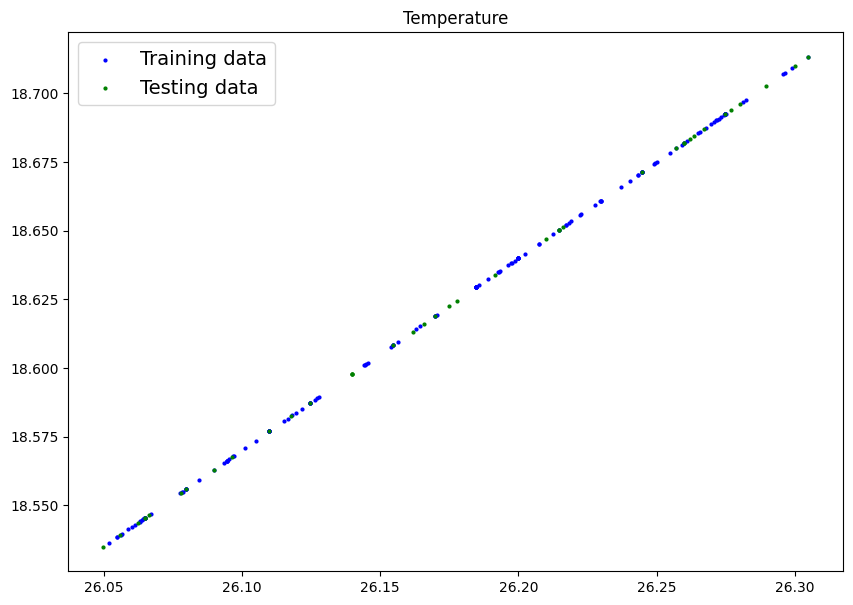

In [15]:
# For temperature
plot_predictions(X_train, y_train, X_test, y_test, title="Temperature")

## 3. Build a model

In [16]:
from torch import nn
# Create linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [17]:
 # Create a random seed
 torch.manual_seed(42)

 # Create an instance of the model (this is a subclass of nn.Module)
 model_0 = LinearRegressionModel()

 # Check out the parameters
 list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [18]:
# Look out what does parameters above refer to
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [19]:
# Check model device
next(model_0.parameters()).device

device(type='cpu')

In [20]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cuda


In [21]:
# Set model to GPU if available
model_0.to(device)
next(model_0.parameters()).device

device(type='cuda', index=0)

In [22]:
X_test

tensor([26.2770, 26.1098, 26.2599, 26.2099, 26.2571, 26.0647, 26.2800, 26.1177,
        26.0623, 26.2162, 26.1547, 26.0779, 26.3047, 26.0964, 26.1698, 26.1399,
        26.0798, 26.2896, 26.2447, 26.2619, 26.0558, 26.1399, 26.1777, 26.1399,
        26.1657, 26.2147, 26.3002, 26.2599, 26.2147, 26.1749, 26.0498, 26.2747,
        26.0664, 26.0647, 26.2635, 26.2671, 26.1247, 26.0898, 26.1617, 26.1914])

## 4. Train model

Go from a poor representation of the data to a better representation, which leads to less loss and more accuracy

In [23]:
# Check model_0 parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367], device='cuda:0')),
             ('bias', tensor([0.1288], device='cuda:0'))])

In [24]:
# Set up a loss functions
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

### 4.1 Building a training loop
0. Loop through data
1. Forward pass (this involves data moving through our model's forward() functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimize zero grad
4. Loss backward - move backwards though the network to calculate the gradients of each of the parameters of our model with respect to the loss (backpropagation)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (gradient descent)

In [25]:
# Put data on available device
# If not, error will happen
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [26]:
X_train.shape

torch.Size([160])

In [27]:
# Make pre-preds
with torch.inference_mode():
  untrained_preds = model_0(X_test)

print(f"Lenght of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Lenght of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions: \n{untrained_preds[:10]}")
print(f"\nFirst 10 labels: \n{y_test[:10]}")

Lenght of predictions: 40, Shape: torch.Size([40])
Lenght of test samples: 40, Shape: torch.Size([40])

First 10 predictions: 
tensor([8.9760, 8.9197, 8.9703, 8.9534, 8.9693, 8.9045, 8.9770, 8.9224, 8.9037,
        8.9556], device='cuda:0')

First 10 labels: 
tensor([18.6939, 18.5769, 18.6819, 18.6469, 18.6800, 18.5453, 18.6960, 18.5824,
        18.5436, 18.6514], device='cuda:0')


In [28]:
# Building a training loop for temperature
torch.manual_seed(42)
# Define epochs
epochs = 1000

# Training
# 0. Loop through the data
for epoch in range(epochs):
  # Training mode
  model_0.train()

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  # Testing mode
  model_0.eval()

  with torch.inference_mode():
    # 1. Forward pass
    test_pred = model_0(X_test)

    # Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train Loss: {loss:.4f} | Test loss: {test_loss:.4f}")

    # Print model state dict (we'll visualize adjusted parameters)
    print(model_0.state_dict())

Epoch: 0 | Train Loss: 9.6810 | Test loss: 2.8196
OrderedDict([('weights', tensor([0.5984], device='cuda:0')), ('bias', tensor([0.1388], device='cuda:0'))])
Epoch: 100 | Train Loss: 4.0422 | Test loss: 2.8196
OrderedDict([('weights', tensor([0.5984], device='cuda:0')), ('bias', tensor([0.1388], device='cuda:0'))])
Epoch: 200 | Train Loss: 4.0422 | Test loss: 2.8196
OrderedDict([('weights', tensor([0.5984], device='cuda:0')), ('bias', tensor([0.1388], device='cuda:0'))])
Epoch: 300 | Train Loss: 4.0422 | Test loss: 2.8196
OrderedDict([('weights', tensor([0.5984], device='cuda:0')), ('bias', tensor([0.1388], device='cuda:0'))])
Epoch: 400 | Train Loss: 4.0422 | Test loss: 2.8196
OrderedDict([('weights', tensor([0.5984], device='cuda:0')), ('bias', tensor([0.1388], device='cuda:0'))])
Epoch: 500 | Train Loss: 4.0422 | Test loss: 2.8196
OrderedDict([('weights', tensor([0.5984], device='cuda:0')), ('bias', tensor([0.1388], device='cuda:0'))])
Epoch: 600 | Train Loss: 4.0422 | Test loss: 2.8

In [29]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8602], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.1488], device='cuda:0', requires_grad=True)]